Assignment 2
Hi guys this is your assignment 2...This assignment test your knowledge of linear/multiple/logistic regression

Apply the model you find the most suitable on the given datasets Remember (Performing EDA is must).. Watch videos again if you are not able to find out

Dataset1=Car_price(Excel file is put in the drive link ) you will get it in github repository Dataset2=fastfood(in the drive link

carprice database--> multiple linear regression


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv("CarPrice_Assignment.csv")

In [ ]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [17]:
data=data[['symboling','wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']]

In [18]:
data.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [19]:
x=data.drop(['price'],axis=1).values
y=data['price'].values

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=0)

In [51]:
# training the model
from sklearn.linear_model import LinearRegression
ml=LinearRegression()
ml.fit(x_train,y_train)
c=ml.intercept_
m=ml.coef_
print("intercept: ",c ,"coefficient:",m)


intercept:  -61891.22054050828 coefficient: [ 4.10171848e+02  1.45585720e+02 -1.13230659e+02  7.11366044e+02
  1.76333374e+02  2.52685426e+00  9.87288356e+01 -7.39510469e+02
 -3.11428449e+03  2.80005958e+02  3.88228592e+01  2.28508182e+00
 -2.90954581e+02  1.99694411e+02]


In [22]:
#predicting the test results
y_pred=ml.predict(x_test)
print(y_pred)

[ 6168.80076375 19278.85812131 15406.73096522  -621.06706414
 11770.45405805 13829.1148795   6465.21715348  6097.94403535
 23356.3380111   8489.81676607 15561.86711768 37000.28781824
  9796.28213359 13680.05175346  5685.08929067 13505.67753461
 10514.79215033 19342.25873286  9849.35840729  6281.98283663
 11203.97101611 18301.56168951 10808.99403485 13917.5547785
 22525.11728567  8669.47161316  6373.30772585 18367.97707646
  6424.4680041   5891.92707222 10215.32526205 11010.65158747
 21382.57015964  8116.88554701  6015.74293082 26327.55156907
 11292.98997327 17662.59717319  6471.2843826  38202.1338206
  6006.82123949]


In [24]:
#checking predictions from first row
ml.predict([[3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27	]])
#actual value=13495.0


array([13225.77905166])

In [59]:
from sklearn.metrics import mean_squared_error
y_pred1=ml.predict(x_train)
m=mean_squared_error(y_train, y_pred1)
print(m)

8452409.734767182


In [27]:
#evaluating the model
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)#r2_score for testing

0.8154617831891964

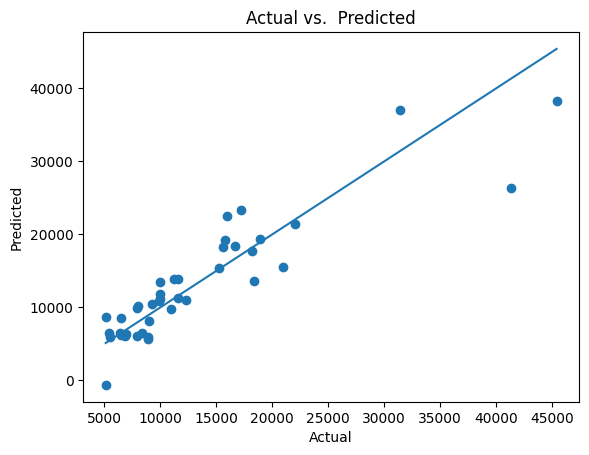

In [42]:
plt.scatter(y_test,y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs.  Predicted')
plt.show()

FAST FOOD DATABASE--> LOGICAL


In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [88]:
data1=pd.read_csv("fastfood.csv")
data1.head()

,restaurant,item,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium,Healthy
0,Mcdonalds,Artisan Grilled Chicken Sandwich,380,60,7,2.0,0.0,95,1110,44,3.0,11,37.0,4.0,20.0,20.0,1
1,Mcdonalds,Single Bacon Smokehouse Burger,840,410,45,17.0,1.5,130,1580,62,2.0,18,46.0,6.0,20.0,20.0,0
2,Mcdonalds,Double Bacon Smokehouse Burger,1130,600,67,27.0,3.0,220,1920,63,3.0,18,70.0,10.0,20.0,50.0,0
3,Mcdonalds,Grilled Bacon Smokehouse Chicken Sandwich,750,280,31,10.0,0.5,155,1940,62,2.0,18,55.0,6.0,25.0,20.0,1
4,Mcdonalds,Crispy Bacon Smokehouse Chicken Sandwich,920,410,45,12.0,0.5,120,1980,81,4.0,18,46.0,6.0,20.0,20.0,0


In [92]:
data1.isnull().sum()

restaurant       0
item             0
calories         0
cal_fat          0
total_fat        0
sat_fat          0
trans_fat        0
cholesterol      0
sodium           0
total_carb       0
fiber           12
sugar            0
protein          1
vit_a          214
vit_c          210
calcium        210
Healthy          0
dtype: int64

In [90]:
data1['fiber'].value_counts()

2.0     102
3.0      82
4.0      71
1.0      65
5.0      64
10.0     30
7.0      23
8.0      15
6.0      14
0.0      12
9.0       9
12.0      5
16.0      3
13.0      2
14.0      2
11.0      2
15.0      1
17.0      1
Name: fiber, dtype: int64

In [93]:
data1['protein'].value_counts()

23.0     22
14.0     21
15.0     20
13.0     19
16.0     18
         ..
115.0     1
186.0     1
103.0     1
98.0      1
3.0       1
Name: protein, Length: 70, dtype: int64

In [94]:
data1['vit_a'].value_counts()

10.0     43
0.0      35
15.0     30
20.0     26
8.0      24
6.0      23
2.0      20
4.0      16
16.0     15
25.0     14
50.0     13
30.0     10
180.0     9
1.0       6
60.0      6
35.0      3
40.0      3
11.0      2
17.0      1
7.0       1
45.0      1
Name: vit_a, dtype: int64

In [95]:
data1['vit_c'].value_counts()

20.0     36
2.0      34
8.0      30
0.0      29
40.0     28
4.0      26
6.0      23
10.0     19
15.0     14
50.0     14
60.0     11
45.0      9
30.0      8
25.0      7
70.0      5
35.0      3
7.0       2
3.0       2
1.0       1
16.0      1
90.0      1
200.0     1
400.0     1
Name: vit_c, dtype: int64

In [96]:
data1['calcium'].value_counts()

30.0     37
15.0     35
20.0     30
10.0     24
6.0      22
35.0     20
4.0      19
2.0      18
60.0     18
25.0     16
8.0      14
40.0     12
45.0      7
0.0       5
80.0      5
70.0      5
50.0      3
100.0     3
16.0      2
13.0      2
1.0       2
90.0      2
27.0      1
3.0       1
14.0      1
290.0     1
Name: calcium, dtype: int64

In [97]:
data1=data1.fillna({'fiber':'2.0','protein':'23.0','vit_a':'10.0','vit_c':'20.0','calcium':'30.0'})

In [98]:
data1=data1[['calories','cal_fat','total_fat','sat_fat','trans_fat','cholesterol','sodium','total_carb','fiber','sugar','protein','vit_a','vit_c','calcium','Healthy']]
data1.head()

,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium,Healthy
0,380,60,7,2.0,0.0,95,1110,44,3.0,11,37.0,4.0,20.0,20.0,1
1,840,410,45,17.0,1.5,130,1580,62,2.0,18,46.0,6.0,20.0,20.0,0
2,1130,600,67,27.0,3.0,220,1920,63,3.0,18,70.0,10.0,20.0,50.0,0
3,750,280,31,10.0,0.5,155,1940,62,2.0,18,55.0,6.0,25.0,20.0,1
4,920,410,45,12.0,0.5,120,1980,81,4.0,18,46.0,6.0,20.0,20.0,0


In [100]:
x=data1.drop(['Healthy'],axis=1).values
y=data1['Healthy'].values

In [101]:
#splitting of data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=0)

In [107]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.fit_transform(x_test)

In [110]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression(random_state=0).fit(x_train_scaled, y_train)
#model training


In [113]:
log_reg.predict(x_train_scaled)#prediction for training data


array([ 1,  0,  1,  1,  0,  1,  1,  0,  1,  0,  0,  0,  1,  1,  1,  0,  1,
        1,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  0,  1,  1,  1,  1,  0,
        1,  0,  0,  1,  1,  0,  0,  0,  1,  1,  1,  1,  0,  1,  1,  1,  0,
        0,  1,  0,  1,  0,  0,  1,  1,  1,  1,  1,  0,  0,  1,  0,  1, 80,
        1,  0,  0,  0,  1,  0,  1,  1,  1,  0,  0,  1,  1,  1,  1,  0,  0,
        0,  1,  1,  1,  1,  0,  0,  0,  1,  1,  0,  1,  1,  1,  1,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  0,  0,  0,  0,  1,
        0,  1,  1,  1,  0,  1,  0,  0,  0,  1,  1,  0,  0,  0,  1,  1,  0,
        0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  0,  0,  1,  1,  1,  1,
        1,  1,  0,  0,  1,  0,  1,  1,  1,  0,  1,  0,  1,  0,  1,  1,  1,
        1,  1,  0,  0,  1,  1,  0,  1,  0,  1,  0,  1,  0,  0,  0,  0,  0,
        0,  0,  1,  0,  0,  1,  1,  0,  0,  0,  1,  1,  0,  1,  1,  1,  1,
        1,  1,  0,  0,  0,  1,  0,  1,  0,  1,  0,  0,  1,  1,  1,  0,  0,
        1,  0,  1,  1,  1

In [114]:
log_reg.score(x_train_scaled,y_train)#percentage of accuracy on training data

0.9393203883495146

In [115]:
log_reg.predict(x_test_scaled)#prediction for testing data

array([1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1])

In [116]:
log_reg.score(x_test_scaled,y_test)#percentage of accuracy on testing data

0.9611650485436893

In [118]:
#if the percentages of both trainig and testing are not good(lower than required) then we can improve the model by the following method:
log_reg=LogisticRegression(random_state=0,
                           C=1,  # c and fit_intercept are parameters
                           fit_intercept=True).fit(x_train_scaled, y_train)

In [121]:
log_reg.score(x_train_scaled,y_train)



0.9393203883495146

In [122]:
log_reg.score(x_test_scaled,y_test)

0.9611650485436893

If after improving the model also, the percentages remain same, it means it is the most it can get as c=1. Here, it did not increase but each data set is different and  it can help in some other dataset.So, changing parameters can sometimes increase the percentage by a significant value.